In [1]:
from compute_crop_water import compute_crop_water

In [2]:
import pandas as pd

In [3]:
crop_coeff = 1.15
temperatures = [5.1, 7.8, 13.9, 30.2, 25.4, 30.0, 31.9, 29.4, 23.5, 17.5, 11.0, 7.3]
relative_humidity = [58, 59, 50, 41, 30, 23, 25, 25, 24, 29, 40, 52]
precipitation = [54.0, 42.0, 41.1, 18.7, 2.2, 0, 2.3, 1.0, 0, 2.3, 7.0, 20.0]
solar_radiation = [4.67, 4.67, 7.62, 7.62, 7.62, 8.95, 8.95, 8.95, 6.14, 6.14, 6.14, 4.67]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [4]:
data = {'months': months, 'temperatures': temperatures, 'relative_humidity': relative_humidity, 'precipitation': precipitation, 'solar_radiation': solar_radiation}
df = pd.DataFrame(data)

In [5]:
df['crop_water'] = df.apply(lambda row: compute_crop_water(row['temperatures'], row['solar_radiation'], row['relative_humidity'], crop_coeff), axis=1)

In [6]:
df['irrigation_water'] = df['crop_water'] - df['precipitation']
df

,months,temperatures,relative_humidity,precipitation,solar_radiation,crop_water,irrigation_water
0,January,5.1,58,54.0,4.67,6.476243,-47.523757
1,February,7.8,59,42.0,4.67,6.455895,-35.544105
2,March,13.9,50,41.1,7.62,11.367863,-29.732137
3,April,30.2,41,18.7,7.62,12.044919,-6.655081
4,May,25.4,30,2.2,7.62,12.490093,10.290093
5,June,30.0,23,0.0,8.95,15.117261,15.117261
6,July,31.9,25,2.3,8.95,15.060109,12.760109
7,August,29.4,25,1.0,8.95,15.022247,14.022247
8,September,23.5,24,0.0,6.14,10.164329,10.164329
9,October,17.5,29,2.3,6.14,9.948710,7.648710


In [7]:
df.to_csv('wheat_crop_water.csv', index=False)

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
np.maximum()

/var/folders/gs/k8flpcl54bn2_pmmd9tlfhx80000gn/T/ipykernel_33042/3333211778.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


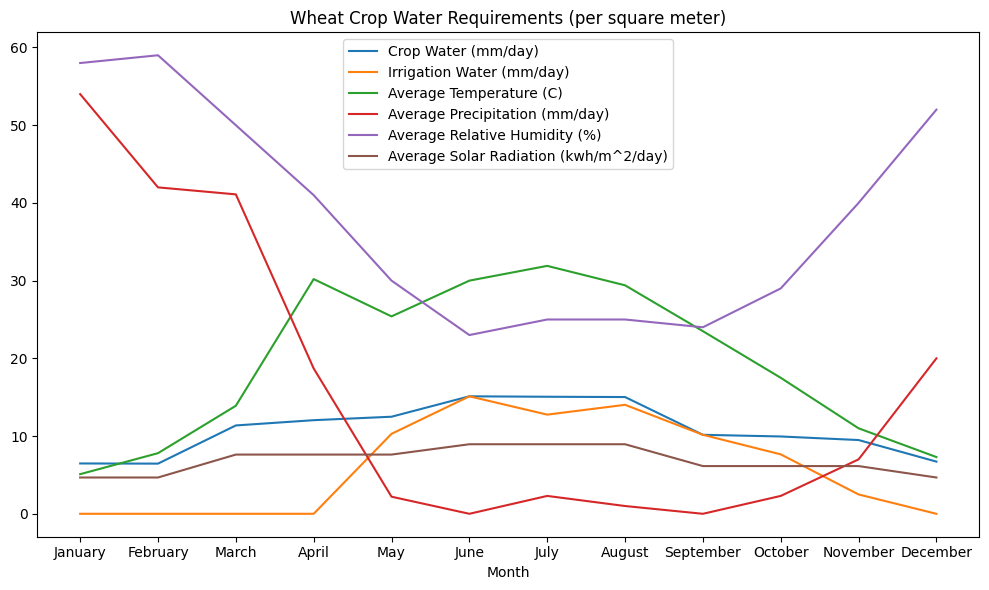

In [21]:

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['months'], df['crop_water'], label='Crop Water (mm/day)')
ax.plot(df['months'], np.maximum(df['irrigation_water'], 0), label='Irrigation Water (mm/day)')
ax.plot(df['months'], df['temperatures'], label='Average Temperature (C)')
ax.plot(df['months'], df['precipitation'], label='Average Precipitation (mm/day)')
ax.plot(df['months'], df['relative_humidity'], label='Average Relative Humidity (%)')
ax.plot(df['months'], df['solar_radiation'], label='Average Solar Radiation (kwh/m^2/day)')

ax.set_xlabel('Month')
# ax.set_ylabel('Water (mm/day)')
ax.set_title('Wheat Crop Water Requirements (per square meter)')
ax.legend()
# ax.grid(True)

fig.tight_layout()

fig.show()
